In [44]:
import pandas as pd

In [45]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [46]:
# First 5 rows in the data 
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [47]:
# Last 5 rows in the data
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [48]:
# Check the shape of the data
data.shape

(200, 4)

## The features in data:
- TV
- Radio
- Newspaper

## What is the target variable?
- Sales (We'll use the three mediums in marketing (television, radio, and newspaper) to predict the total sales for the particular market or company. 
- **NOTE**: Sales is a continous factor (can take the value of decimals). Thus, this our result variable a continous variable. 

___
# Part 1: Data Analysis (understand the data)

In [49]:
import seaborn as sns
%matplotlib inline

from sklearn import metrics
import numpy as np

# Splitting the data into test and train sets
from sklearn.model_selection import train_test_split


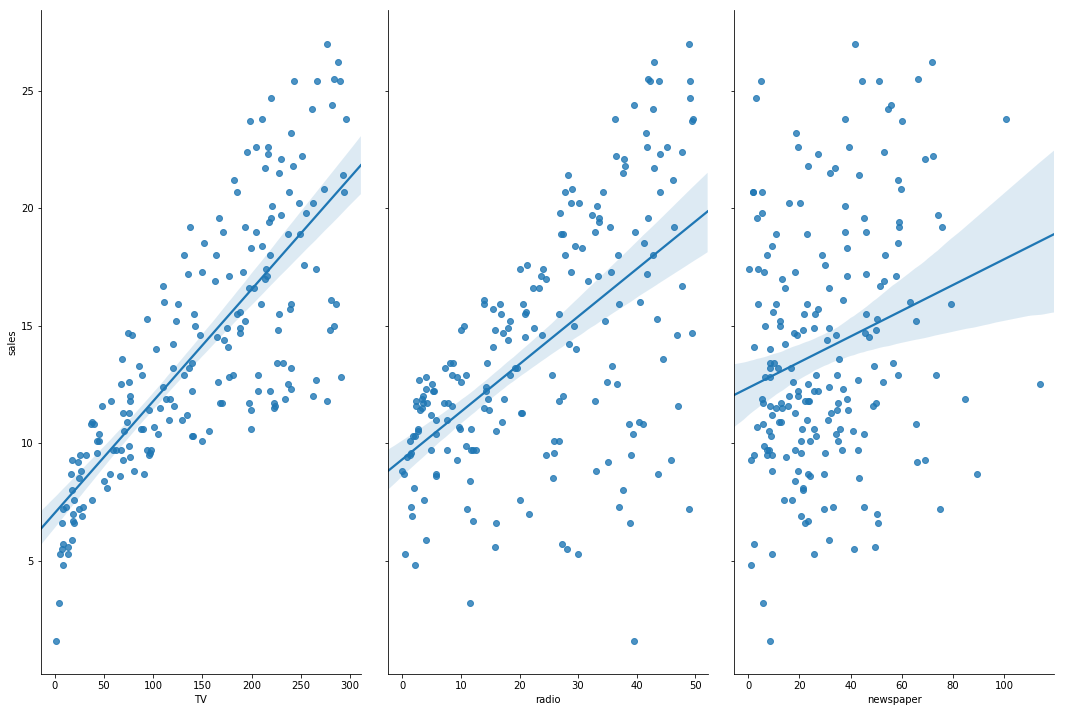

In [50]:
# Visualize the relationship between the feature variables and the target variable
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=10, aspect=.5, kind='reg')

**Result:**
- Appears to a linear relationship with TV, less so with Radio. There appear not to be a relationship with Newspaper 
and Sales.

In [51]:
# Store variables
fts_clms = ['TV', 'radio', 'newspaper']
X_fts = data[fts_clms]

y_trgt = data['sales']

# Quick look at variables
print(X_fts.shape)
print(y_trgt.shape)

(200, 3)
(200,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, test_size=0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [53]:
# Linear regression modeling
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Quick look at the coefficients and intercepts
print(linreg.coef_)
print(linreg.intercept_)

[ 0.04656457  0.17915812  0.00345046]
2.87696662232


In [54]:
# Pair the feature 'name' with its appropriate coefficient
list(zip(fts_clms, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

## Intepreating the coefficient
$$ y = 2.8770 + 0.0466 (TV) + 0.1792 (Radio) + 0.0035 (Newspaper)$$
- For every 1,000 dollars increase in TV, there's a 46.66 increase in units solds
- For every 1,000 dollars increase in Radio, there's a 179.20 increase in units sold
- For every 1,000 dollars increase in Newspaper, there's an 3.35 increase in units sold


In [55]:
# Make prediction
y_pred = linreg.predict(X_test)

In [56]:
# Mean Absolute Error
mean_abs_err = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_err

1.0668917082595213

In [57]:
# Mean Squared Error
mean_sqr_err = metrics.mean_squared_error(y_test, y_pred)
mean_sqr_err

1.9730456202283384

In [58]:
# Root Mean Squared Error
root_mean_error = np.sqrt(mean_sqr_err)

**Note**
Great article on the difference between the root mean squared error and mean absolute error. Basically,
because the root mean squares the difference and then finds the average, it can be skewed to the higher end when 
there are large differences.
- Great quick read on this: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

### Repeating linear regression without newspaper

In [59]:
fts_clms = ['TV', 'radio']
X_fts = data[fts_clms]

y_trgt = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, test_size=0.25, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mean_sqr_err = metrics.mean_squared_error(y_test, y_pred)
root_mean_error = np.sqrt(mean_sqr_err)

print(root_mean_error)

1.38790346994


**NOTE**
This model produces a lower RMSE. The lower the RMSE is the better. 